2.5 Explore Relationships between Attributes 

In order to better understand the structure of the dataset, the relationships between the attributes were explored using different visualization methods below. These methods helped identify patterns, associations, and dependencies between the variables. It provided insight on how different variables relate to one another before modeling and prediction.

In [60]:
# Importing libraries for visualization 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the dataset and view it
df = pd.read_csv("train.csv")
df.head()

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed


In [38]:
# Checking column names 
df.shape
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch', 'CGPA',
       'Internships', 'Projects', 'Coding_Skills', 'Communication_Skills',
       'Aptitude_Test_Score', 'Soft_Skills_Rating', 'Certifications',
       'Backlogs', 'Placement_Status'],
      dtype='object')

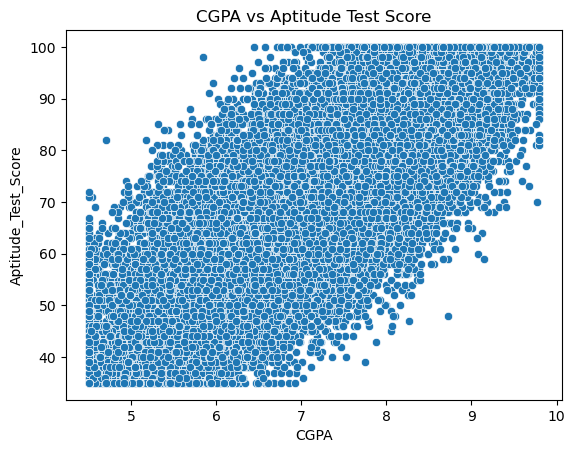

In [40]:
# Scatter plot of CGPA and Aptitude Test Score 
sns.scatterplot(data=df, x="CGPA", y="Aptitude_Test_Score")
plt.title("CGPA vs Aptitude Test Score")
plt.show()

The scatter plot above shows a strong positive relationship between the variables CGPA and aptitude test score. As CGPA increases, the aptitude test scores tend to also increase. This suggests that students who have done well academically tend to do well on aptitude tests. Although there is some variability at each CGPA value, the overall upward trend shows that there is consistency between academic performance and aptitude tests. 

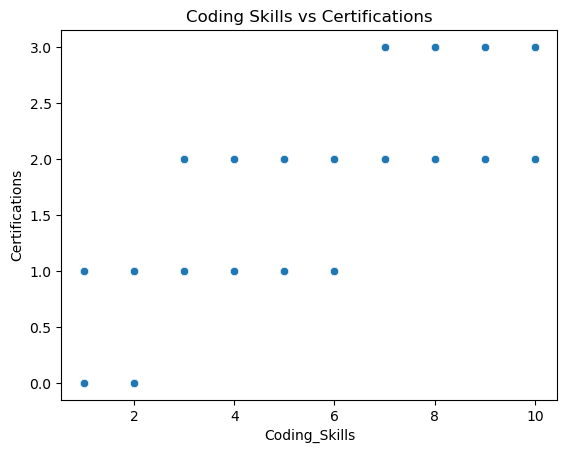

In [48]:
# Scatter plot of Coding Skills and Certifications
sns.scatterplot(data=df, x="Coding_Skills", y="Certifications")
plt.title("Coding Skills vs Certifications")
plt.show()

The scatterplot above shows a positive relationship between coding skills and the number of certifications. The higher the coding skill level is generally associated with more certifications. Certifications only have a few discrete values, which is why the relationship appears in a horizontal band instead of a continuous trend. The upward trend is still shown, even with it appearing differently. 

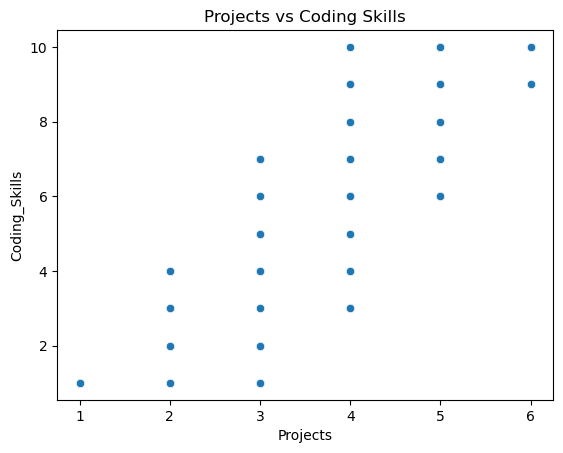

In [49]:
# Scatter plot of Projects and Coding Skills
sns.scatterplot(data=df, x="Projects", y="Coding_Skills")
plt.title("Projects vs Coding Skills")
plt.show()

The scatterplot above shows that there is clear positive relationship between the number of projects and coding skill level. It appears that someone who has completed more projects tend to have higher coding skills as well. This suggests that hands-on work is associated with skill development. 

In [50]:
# Computing correlation matrix 
numeric_cols = [
    "Age", "CGPA", "Internships", "Projects",
    "Coding_Skills", "Communication_Skills",
    "Aptitude_Test_Score", "Soft_Skills_Rating",
    "Certifications", "Backlogs"
]

df[numeric_cols].corr() 

,Age,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs
Age,1.000000,0.002480,-0.003742,-0.000880,-0.003190,-0.004219,0.004475,-0.000476,0.001611,0.000329
CGPA,0.002480,1.000000,0.367628,0.708759,0.485787,0.001603,0.707579,0.001493,0.561624,-0.575653
Internships,-0.003742,0.367628,1.000000,0.505756,0.519205,0.003693,0.260352,0.000992,0.460924,-0.204971
Projects,-0.000880,0.708759,0.505756,1.000000,0.896575,0.001265,0.502745,0.004829,0.828197,-0.401139
Coding_Skills,-0.003190,0.485787,0.519205,0.896575,1.000000,0.000701,0.344470,0.005813,0.859683,-0.280002
Communication_Skills,-0.004219,0.001603,0.003693,0.001265,0.000701,1.000000,0.001268,0.007540,-0.002296,0.001590
Aptitude_Test_Score,0.004475,0.707579,0.260352,0.502745,0.344470,0.001268,1.000000,-0.000178,0.533548,-0.409364
Soft_Skills_Rating,-0.000476,0.001493,0.000992,0.004829,0.005813,0.007540,-0.000178,1.000000,0.005387,0.003054
Certifications,0.001611,0.561624,0.460924,0.828197,0.859683,-0.002296,0.533548,0.005387,1.000000,-0.322768
Backlogs,0.000329,-0.575653,-0.204971,-0.401139,-0.280002,0.001590,-0.409364,0.003054,-0.322768,1.000000


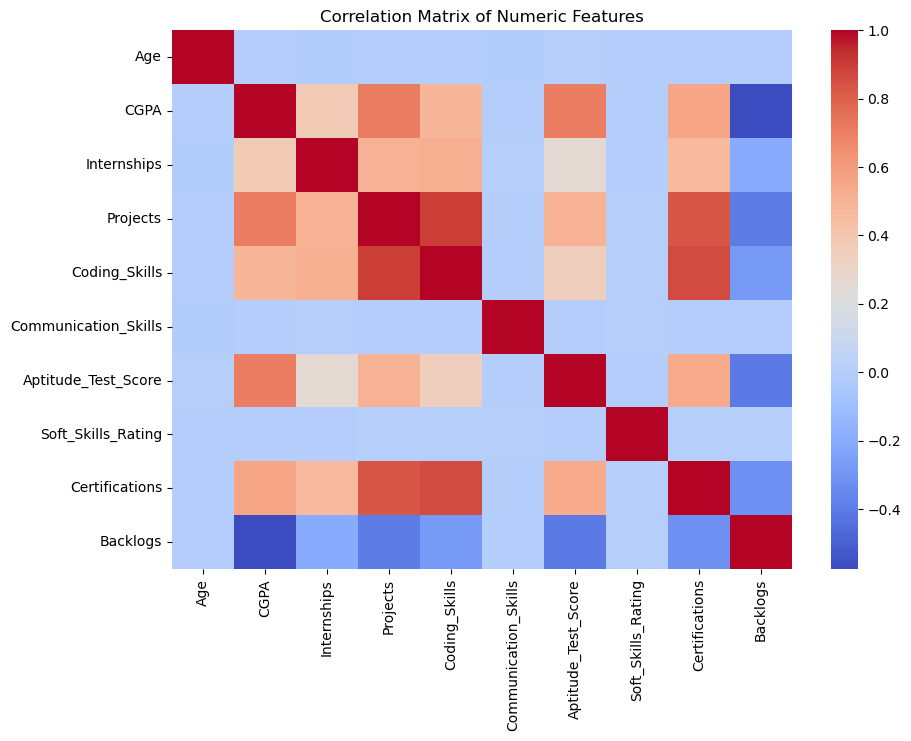

In [56]:
# Heat Map of the correlation matrix 
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

The correlation matrix above shows several meaningful relationships between the variables in the dataset. Technical experience variables, including coding skills, projects, and certifications, show strong positive correlations with one another, suggesting that they are closely related and reflect similar aspects of technical proficiency. Academic variables including CGPA and aptitude test score are moderately correlated, which indicates that these two measures reflect similar academic performance. Backlogs show negative correlations with most academic and technical variables, suggesting that students with more backlogs tend to not perform as well in other areas. In comparison, age and communication skills show little correlation with the other variables. This would imply that they provide mostly independent information.

In [51]:
# Cross-tabulation of Gender and Placement Status
pd.crosstab(df["Gender"], df["Placement_Status"], normalize="index")

Placement_Status,Not Placed,Placed
Gender,,
Female,0.638683,0.361317
Male,0.636327,0.363673


The cross-tabulation above shows that placement rates are almost the same for male and females. This suggests that gender may not be a strong factor in determining placement in the dataset.

In [52]:
# Cross-tabulation of Degree and Placement Status
pd.crosstab(df["Degree"], df["Placement_Status"], normalize="index")

Placement_Status,Not Placed,Placed
Degree,,
B.Sc,0.635027,0.364973
B.Tech,0.641928,0.358072
BCA,0.640691,0.359309
MCA,0.632474,0.367526


The cross-tabulation above shows that placement rates are very similar across the different degrees acquired. There appears to only be small differences between the degrees in whether they were placed or not. MCA and B.Sc degrees have slightly higher placement rates than B.Tech and BCA degrees.The overall difference is small, which indicates that degree type alone does not strongly influence placement outcomes in the dataset.

In [53]:
# Cross-tabulation of Branch and Placement Status
pd.crosstab(df["Branch"], df["Placement_Status"], normalize="index")

Placement_Status,Not Placed,Placed
Branch,,
CSE,0.573701,0.426299
Civil,0.719074,0.280926
ECE,0.638489,0.361511
IT,0.578453,0.421547
ME,0.677341,0.322659


The cross-tabulation above shows that there is some variation in placement rates across different academic branches. CSE and IT show higher placement rates compared to Civil and ME. ECE falls in the middle, with the  placement rate being close to the average. This suggests that branch may be associated with placement outcomes, although it is likely not the only factor influencing placement.

In [55]:
# Computing group-wise averages of numeric variables by placement status 
df.groupby("Placement_Status")[numeric_cols].mean()

,Age,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs
Placement_Status,,,,,,,,,,
Not Placed,20.994736,6.633941,0.579406,3.385388,5.030919,5.129322,65.293712,5.504845,1.568182,1.247978
Placed,21.007418,7.650109,1.116479,4.347719,6.854095,6.156449,76.581351,5.496015,2.210336,0.255272


The group-wise averages above show that there are differences between placed and not placed students across some of the variables. Placed students appear to have a higher average CGPA, aptitude test scores, coding skills, number of projects, and number of internships. This would indicate that a stronger academic performance, higher technical skills, and more practical experience have influence on placement. They also tend to have more certifications and have significantly less backlogs on average. In comparison, age and soft skills rating are very similar between placed and not placed. This would suggest that these variables have less influence on placement. Overall, the group-wise average suggests that academic strength, technical skills, and hands-on experience are associated with placement status.

2.6 Relationships Between Features and Placement Status

This section focuses on how key features relate to placement status, showing the differences between placed and not placed students. The objective is to find the variables that appear to be strongly correlated to predicting placement outcomes. 

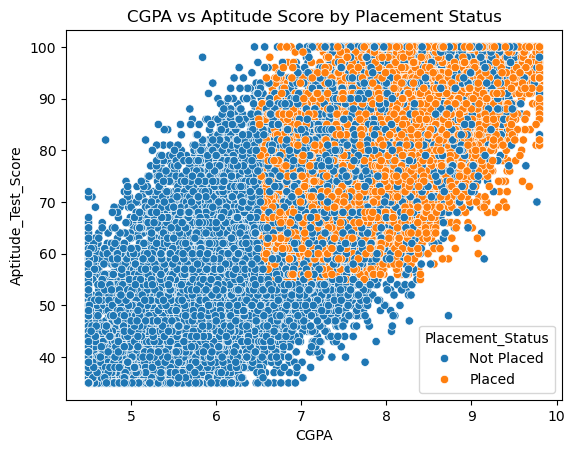

In [57]:
# Scatter plot of CGPA and Aptitude Score by Placement Status 
sns.scatterplot(
    data=df,
    x="CGPA",
    y="Aptitude_Test_Score",
    hue="Placement_Status"
)
plt.title("CGPA vs Aptitude Score by Placement Status")
plt.show()

The scatterplot above shows that placed students tend to cluster at the higher values for both CGPA and aptitude test scores. In comparison, the not placed students are clustered around the lower values. Although there is some overlap between placed and not placed students, the separation is more apparent as both CGPA and aptitude test scores increase. This suggests that the combination of academic performance and aptitude is associated with a better placement outcome.

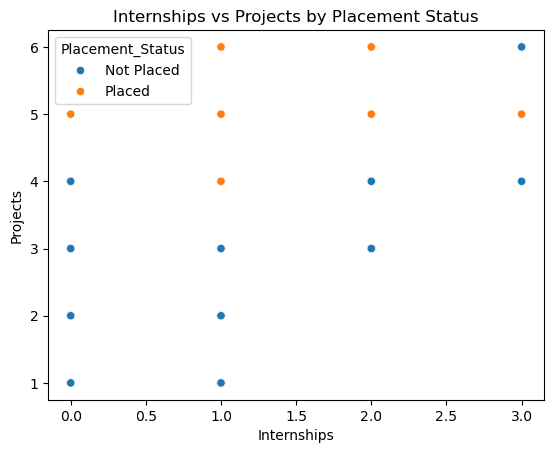

In [58]:
# Scatter plot of Internships and Projects by Placement Status 
sns.scatterplot(
    data=df,
    x="Internships",
    y="Projects",
    hue="Placement_Status"
)
plt.title("Internships vs Projects by Placement Status")
plt.show()

The scatterplot above shows that placed students tend to have higher numbers in both internships and projects compared to the not placed students. Placed students are observed to be in the area with multiple internships and a higher project count. The not placed students appear to be mostly in the lower values for both variables. This would suggest that more experience is associated with a better placement outcome. 

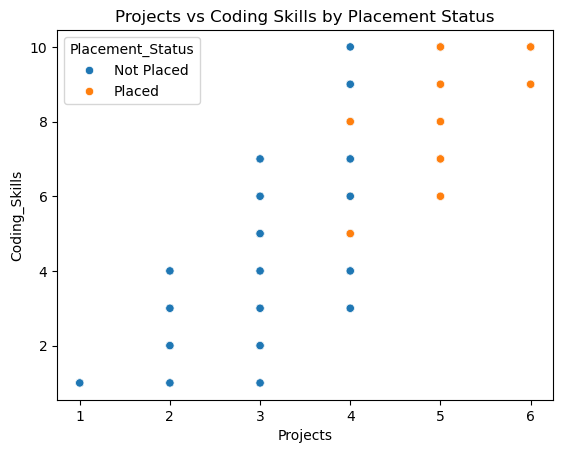

In [43]:
# Scatter plot of Proje and Aptitude Score by Placement Status 
sns.scatterplot(
    data=df,
    x="Projects",
    y="Coding_Skills",
    hue="Placement_Status"
)
plt.title("Projects vs Coding Skills by Placement Status")
plt.show()

The scatterplot above shows a positive relationship between projects and coding skills, with placed students being clustered around the higher values for both projects and coding skills. Placed students appear to generally have more projects and stronger coding skills compared to not placed students who appear to have less projects and not as advanced coding skills. This would suggest that the combination of project experience and technical skill is associated with a better placement outcome.